<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_10520\1862119210.py:32: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{d}$ (m^0.5)')
C:\Users\User\AppData\Local\Temp\ipykernel_10520\1862119210.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Graph of Mean Time vs. $\sqrt{d}$')


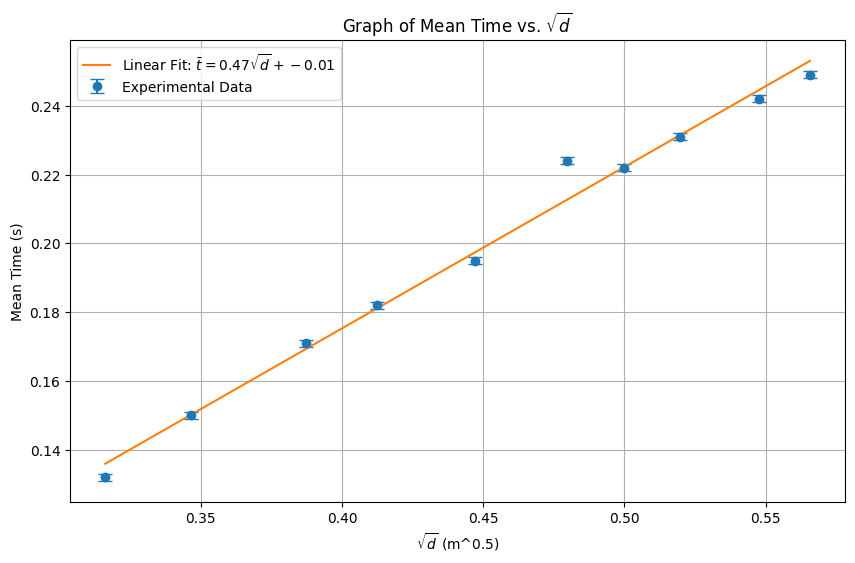

Slope: 0.4691 s/m^0.5
Standard error of the slope: 0.0185 s/m^0.5
value of g: 9.09 m/s^2
Standard error in g: 1.43 m/s^2
value of Δt: -0.01 s
Standard error of Δt (intercept): 0.0085 s
R-correlation: 0.99


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
distances_cm = np.array([10, 12, 15, 17, 20, 23, 25, 27, 30, 32])  # in cm
distances_m = distances_cm / 100  # converting cm to m
sqrt_distances_m = np.sqrt(distances_m)  # √d in meters

# Replace this with your calculated mean times in seconds
mean_times_s = np.array([0.132, 0.150, 0.171, 0.182, 0.195, 0.224, 0.222, 0.231, 0.242, 0.249])
# Replace this with your error values for the mean times
mean_time_errors_s = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

# Perform linear regression using scipy.stats.linregress to get standard error of the slope
regression_result = linregress(sqrt_distances_m, mean_times_s)
slope = regression_result.slope
intercept = regression_result.intercept
slope_std_err = regression_result.stderr
intercept_std_err = regression_result.intercept_stderr
r_value = regression_result.rvalue

# Determine g and its error from the slope and standard error of the slope
g = 2 / slope**2
g_error = (4 * slope_std_err / slope**3) * 2

# Plotting the graph with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(sqrt_distances_m, mean_times_s, yerr=mean_time_errors_s, fmt='o', label='Experimental Data', capsize=5)
plt.plot(sqrt_distances_m, intercept + slope * sqrt_distances_m, '-', label=f'Linear Fit: $\\bar{{t}} = {slope:.2f}\\sqrt{{d}} + {intercept:.2f}$')

plt.xlabel('$\sqrt{d}$ (m^0.5)')
plt.ylabel('Mean Time (s)')
plt.title('Graph of Mean Time vs. $\sqrt{d}$')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated values of m, g, Δt, and the error
print(f"Slope: {slope:.4f} s/m^0.5")
print(f"Standard error of the slope: {slope_std_err:.4f} s/m^0.5")
print(f"value of g: {g:.2f} m/s^2")
print(f"Standard error in g: {g_error:.2f} m/s^2")
print(f"value of Δt: {intercept:.2f} s")
print(f"Standard error of Δt (intercept): {intercept_std_err:.4f} s")
print(f"R-correlation: {r_value:.2f}")

